In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
simulated = pd.read_csv('~/Documents/PhD/Projects/10. ELECSIM/run/validation-optimisation/runs_2013/demand_none-carbon_none-datetime_2019-08-08_09-27-18-capacity_52152.csv')
simulated.head()

,Unnamed: 0,contributed_CCGT,contributed_Coal,contributed_Onshore,contributed_Offshore,contributed_PV,contributed_Nuclear,contributed_Recip_gas,contributed_Biomass,total_CCGT,total_Coal,total_Onshore,total_Offshore,total_PV,total_Nuclear,total_Recip_gas,Carbon_tax,total_genco_wealth,Electricity_cost,Carbon_emitted
0,0,269097.12,296496.48,12574.927904,12490.43052,0.0,163428.881549,1955.52,0,31272.0,17737.0,4783.0,2949.0,0.0,9238.0,672.0,23.62,1.063223e+10,64.442533,1231.241252
1,1,151462.08,289680.36,12663.542545,12497.15424,0.0,163428.881549,0.00,0,31272.0,17737.0,4783.0,2949.0,0.0,9238.0,672.0,23.62,7.873103e+09,56.539096,959.583824
2,2,267084.72,288974.10,11658.160728,12340.26744,0.0,163428.881549,1955.52,0,31272.0,17737.0,4783.0,2949.0,0.0,9238.0,672.0,23.62,1.185284e+10,61.471676,1227.092822
3,3,294325.92,291985.58,12562.865178,12522.92850,0.0,163428.881549,3259.20,0,31272.0,17737.0,4783.0,2949.0,0.0,9238.0,672.0,23.62,1.787174e+10,64.982039,1296.709178
4,4,82072.08,214620.09,12500.672367,12497.15424,0.0,146987.366417,0.00,0,31272.0,17737.0,4783.0,2949.0,0.0,9238.0,672.0,23.62,6.998416e+09,46.768186,645.509162


In [21]:
simulated = simulated.rename(columns={'total_genco_wealth':'genco_wealth'})

In [22]:
simulated_long = pd.melt(simulated, id_vars='Unnamed: 0')
simulated_long

,Unnamed: 0,variable,value
0,0,contributed_CCGT,269097.120000
1,1,contributed_CCGT,151462.080000
2,2,contributed_CCGT,267084.720000
3,3,contributed_CCGT,294325.920000
4,4,contributed_CCGT,82072.080000
5,5,contributed_CCGT,284020.560000
6,6,contributed_CCGT,82589.760000
7,7,contributed_CCGT,113242.320000
8,8,contributed_CCGT,231211.440000
9,9,contributed_CCGT,120637.440000


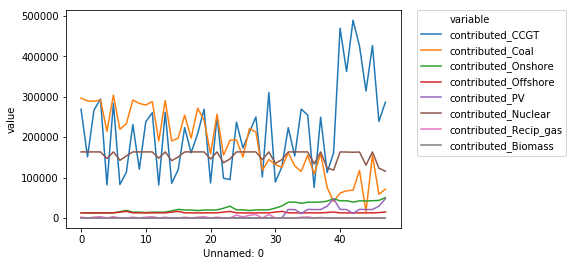

In [26]:
sns.lineplot(data=simulated_long[simulated_long['variable'].str.contains("contributed")], x='Unnamed: 0', y='value', hue='variable')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



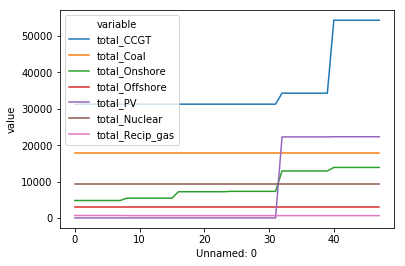

In [24]:
sns.lineplot(data=simulated_long[simulated_long['variable'].str.contains("total")], x='Unnamed: 0', y='value', hue='variable')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

